### Import libraries

In [2]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import cv2 

### Create Dataframe

In [3]:
def create_df(type:str,path:str)->pd.DataFrame:
    columns = ['type','shape','pixel','path']
    df = pd.DataFrame(columns=columns)
    for index,img in enumerate(os.listdir(path)):
        img_path = f'{path}/{img}'
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        df.loc[index]=[type,img.shape,img,img_path]
    return df

In [4]:
glioma_df=create_df(type='glioma',path='./clean_datasets/glioma')
meningioma_df=create_df(type='meningioma',path='./clean_datasets/meningioma')
pituitary_df=create_df(type='pituitary',path='./clean_datasets/pituitary')
normal_df=create_df(type='normal',path='./clean_datasets/normal')


### Basic Information

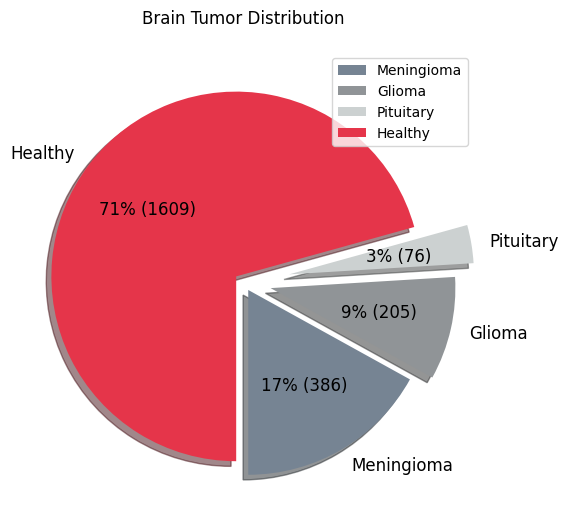

In [5]:
meningioma_count=meningioma_df['type'].size
glioma_count=glioma_df['type'].size
pituitary_count=pituitary_df['type'].size
healthy_count=normal_df['type'].size

labels =[
    'Meningioma',
    'Glioma',
    'Pituitary',
    'Healthy'
]

image_count = [
    meningioma_count,
    glioma_count,
    pituitary_count,
    healthy_count
]
# image_count.sort()

colors=['#768493','#909497','#CCD1D1','#E5354A']
explode=[0.05,0.15,0.25,0.05]

fig, ax = plt.subplots(figsize=(8,6))

def add_label(pct,dataset):
    total = sum(dataset)
    type_count = (pct/100)*total
    return f'{pct:.0f}% ({type_count:.0f})'

patches, texts, autotexts = ax.pie(
    image_count,
    labels=labels,
    autopct=(lambda pct: add_label(pct,image_count)),
    startangle=270,
    shadow=True,
    colors=colors,
    explode=explode,
    textprops={'fontsize':12},
)

ax.set_title('Brain Tumor Distribution', pad=20)

# Styling
# plt.setp(autotexts, color='white')

plt.legend(labels=labels,loc="upper right")
plt.show()

### Calculate mean pixel image

In [6]:
mean_img = np.mean(pituitary_df['pixel'], axis=0)

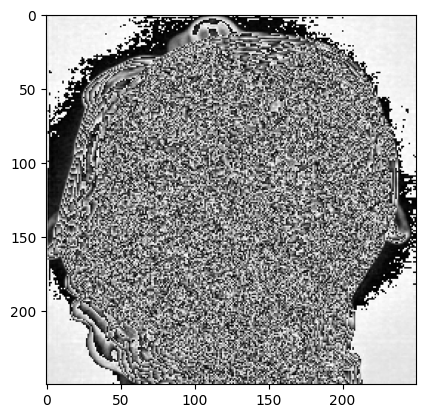

In [7]:
plt.imshow(mean_img,"gray")

### Investiage Pixel ditribution correlation with Image perpective

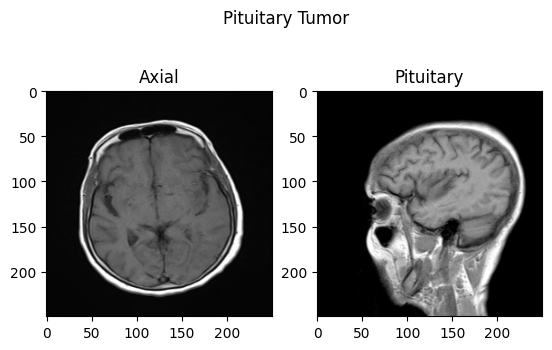

In [ ]:
fig, axes = plt.subplots(1,2)

axial_img = cv2.imread('clean_datasets/pituitary/pituitary_4.jpg',cv2.IMREAD_GRAYSCALE)
coronal_img = cv2.imread('clean_datasets/pituitary/pituitary_39.jpg',cv2.IMREAD_GRAYSCALE)

axes[0].imshow(axial_img,'gray')
axes[0].set_title('Axial')

axes[1].imshow(coronal_img,'gray')
axes[1].set_title('Pituitary')

fig.suptitle('Pituitary Tumor',y=0.9)
plt.show()

In [58]:
axial_img.flatten()

array([12, 12, 12, ..., 12, 12, 12], shape=(187500,), dtype=uint8)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (187500,) and arg 1 with shape (266,).

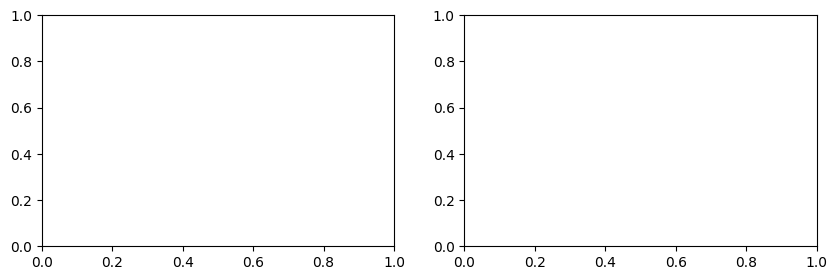

In [60]:
fig, axes = plt.subplots(1,2,figsize=(10,3))

axial_img = cv2.imread('clean_datasets/pituitary/pituitary_4.jpg')
coronal_img = cv2.imread('clean_datasets/pituitary/pituitary_39.jpg')

axes[0].bar(axial_img.flatten(),range(0,266))
axes[1].bar(coronal_img.flatten(),range(0,266))

axes[0].set_title('Axial')
axes[1].set_title('Pituitary')

plt.suptitle('Pituitary Tumor')
plt.show()

In [ ]:
plt.bar(len(axial_img.flatten()),axial_img.flatten())

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1061a3cb0>>
Traceback (most recent call last):
  File "/Users/porter/ASU/DAT490/my_env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


<BarContainer object of 187500 artists>